# US TRAFFIC ANALYSIS

# Importing packages and Authorising Reddit credentials

In [63]:
import praw
import pandas as pd
import datetime as dt

# Entring reddit credentials

user_agent = "Reddit_Scrapper 1.0 by /u/Similar_Annual7584"
reddit = praw.Reddit(
    client_id="3ymwyUdTpGSfyQ5atYxp2w",
    
    client_secret="ZIfVOAEJc9T6FBPU-QK9HjOiPQKKWw",
    
    user_agent=user_agent
)

subreddit_name = 'traffic'
post_limit = 1000  # Adjust the limit as needed

# Fetching the posts from the subreddit
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.hot(limit=post_limit)  # You can use .new(), .top() etc. instead of .hot()

# Storing the data in a list of dictionaries
posts_data = []
for post in posts:
    posts_data.append({
        'title': post.title,
        'score': post.score,
        'id': post.id,
        'url': post.url,
        'comms_num': post.num_comments,
        'created': post.created,
        'body': post.selftext
    })

# Converting the list of dictionaries to a Pandas DataFrame
posts_df = pd.DataFrame(posts_data)

# Converting the 'created' column to a datetime format
posts_df['created'] = posts_df['created'].apply(lambda x: dt.datetime.fromtimestamp(x))

# Save the DataFrame to a CSV file
posts_df.to_csv('traffic.csv', index=False)

print("Data has been saved to traffic.csv")

# Displaying the first few rows of the DataFrame
print(posts_df.head())

Data has been saved to traffic.csv
                                               title  score      id  \
0                        Heard you guys like traffic     34  pgtq47   
1  Traffic in South Africa held up by Giraffe tha...      3  pgi9pb   
2                           Big H on rear windshield      5  pbo8f1   
3                           tRAFFIC IN UGANDA AFRICA      3  p3ba2v   
4                        Is this a red light camera?      9  p20v4j   

                                                 url  comms_num  \
0                https://i.redd.it/2zjw15lih6l71.png         13   
1                       https://youtu.be/L9Kfic86y_U          1   
2  https://www.reddit.com/r/Traffic/comments/pbo8...          2   
3                https://i.redd.it/x1i0cxvte0h71.jpg          0   
4                https://i.redd.it/h6vdilrk6mg71.jpg         15   

              created                                               body  
0 2021-09-02 19:55:39                                       

# Posts per month analysis 

month
2010-01     1
2010-08     1
2011-07     1
2011-11     2
2012-02     1
2012-08     2
2012-09     1
2012-10     1
2013-02     2
2013-03     4
2013-04     1
2013-07     1
2013-08     2
2013-09     3
2013-10     2
2013-11     2
2013-12     4
2014-01     7
2014-02     6
2014-03     4
2014-04     6
2014-05     3
2014-06     7
2014-07     2
2014-08     4
2014-09     2
2014-10     2
2014-11     1
2014-12     4
2015-01     4
2015-02     2
2015-03     3
2015-04     3
2015-06     3
2015-08     3
2015-09     4
2015-10     3
2015-11     3
2015-12     1
2016-01     3
2016-02     2
2016-03     2
2016-04     1
2016-05     2
2018-08     1
2021-01     6
2021-02     2
2021-04     5
2021-05     6
2021-06     3
2021-07    10
2021-08     5
2021-09     2
Freq: M, dtype: int64


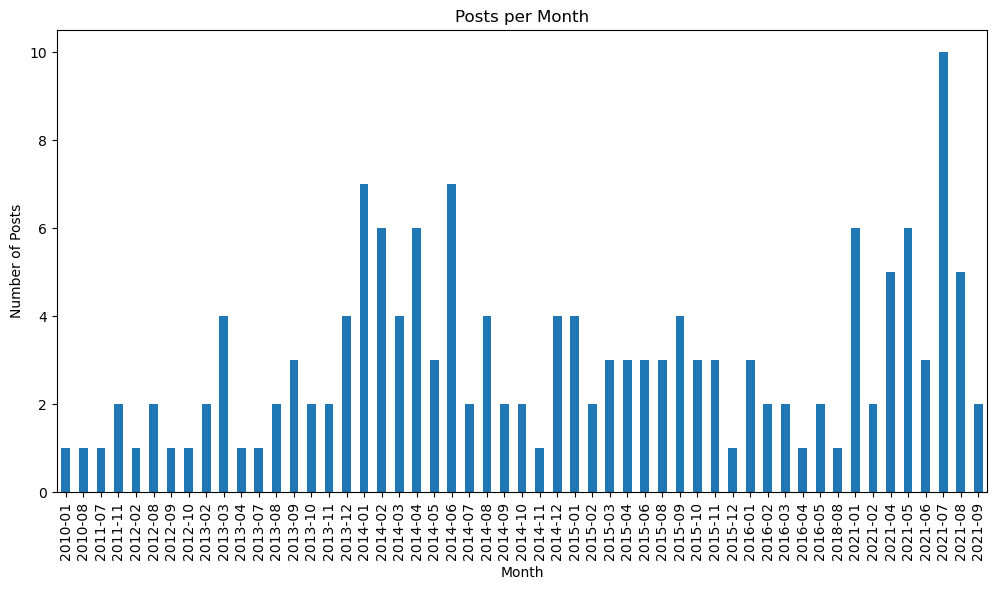

In [64]:
import pandas as pd

# Load the data
df = pd.read_csv('traffic.csv')

# Counting posts per month
df['created'] = pd.to_datetime(df['created'])
df['month'] = df['created'].dt.to_period('M')

posts_per_month = df.groupby('month').size()
print(posts_per_month)

# Plotting
import matplotlib.pyplot as plt

posts_per_month.plot(kind='bar', figsize=(12, 6), title='Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()


# Fetching major US cities

In [65]:
import requests
# Fetching list of major US cities from an open data repository
response = requests.get('https://simplemaps.com/static/data/us-cities/uscitiesv1.5.csv')
with open('uscities.csv', 'wb') as file:
    file.write(response.content)

In [66]:
# Load the city data into a DataFrame
cities_df = pd.read_csv('uscities.csv')
cities = cities_df['city'].unique()
print(cities)

['Prairie Ridge' 'Edison' 'Packwood' ... 'Little Eagle' 'Timber Lake'
 'Goodwill']


In [67]:
# Define the subreddit and the number of posts to scrape per city
subreddit_name = 'traffic'
post_limit = 100

# Function to fetch traffic data for given city

In [68]:
# Function to fetch and analyze posts for a given city
def fetch_city_data(city):
    subreddit = reddit.subreddit(subreddit_name)
    query = city + " traffic"
    posts = subreddit.search(query, limit=post_limit)
    
    city_data = []
    for post in posts:
        city_data.append({
            'city': city,
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'comms_num': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })
    return city_data

# Selecting top 100 cities

In [87]:
# Selecting the top 100 cities by population
top_100_cities = cities_df.nlargest(100, 'population')['city'].unique()
top_100_cities

array(['New York', 'Los Angeles', 'Chicago', 'Miami', 'Dallas',
       'Philadelphia', 'Houston', 'Washington', 'Atlanta', 'Boston',
       'Phoenix', 'Seattle', 'San Francisco', 'Detroit', 'San Diego',
       'Minneapolis', 'Tampa', 'Denver', 'Brooklyn', 'Queens',
       'Baltimore', 'Riverside', 'Saint Louis', 'Las Vegas', 'Portland',
       'San Antonio', 'Sacramento', 'San Jose', 'Orlando', 'Cleveland',
       'Pittsburgh', 'Cincinnati', 'Manhattan', 'Austin', 'Kansas City',
       'Indianapolis', 'Columbus', 'Virginia Beach', 'Charlotte', 'Bronx',
       'Milwaukee', 'Providence', 'Jacksonville', 'Salt Lake City',
       'Nashville', 'Memphis', 'Richmond', 'New Orleans', 'Raleigh',
       'Louisville', 'Oklahoma City', 'Bridgeport', 'Buffalo', 'Hartford',
       'Fort Worth', 'Tucson', 'El Paso', 'Honolulu', 'Omaha', 'McAllen',
       'Albuquerque', 'Birmingham', 'Dayton', 'Rochester', 'Sarasota',
       'Fresno', 'Allentown', 'Tulsa', 'Concord', 'Cape Coral',
       'Springfield'

In [70]:
from joblib import Parallel, delayed
# Use parallel processing to fetch data for all cities
all_data = Parallel(n_jobs=-1)(delayed(fetch_city_data)(city) for city in top_100_cities)
all_data = [item for sublist in all_data for item in sublist]  # Flatten the list

# Converting fetched data to pandas dataframe

In [71]:
# Converting the list of dictionaries to a Pandas DataFrame
posts_df = pd.DataFrame(all_data)

In [72]:
# Converting the 'created' column to a datetime format
posts_df['created'] = posts_df['created'].apply(lambda x: dt.datetime.fromtimestamp(x))

# Saving the dataframe to a csv file

In [73]:
# Save the DataFrame to a CSV file
posts_df.to_csv('traffic_cities_posts.csv', index=False)

# Displaying the first few rows of the DataFrame
print(posts_df.head())

       city                                              title  score      id  \
0  New York  New York State Police Inside Look: Traffic Safety      1  1xm89c   
1  New York  Traffic around New York right now...I'm never ...      2  1vsgds   
2  New York  How New York City could handle the Sandy-cause...      0  12ex9r   
3  New York  LPT: When you move to a new city, observe the ...      1  2osg8u   
4  New York                 A proposal for energy independence      2  1w8q11   

                                                 url  comms_num  \
0  http://www.youtube.com/attribution_link?a=RIG1...          1   
1  https://maps.google.com/?ll=40.714476,-73.9307...          0   
2  https://www.reddit.com/r/Traffic/comments/12ex...          0   
3  https://www.reddit.com/r/Traffic/comments/2osg...          0   
4  https://www.reddit.com/r/Traffic/comments/1w8q...          0   

              created                                               body  
0 2014-02-11 10:15:13              

# Function to calculate congestion of given city

In [74]:
# Function to calculate proneness score with weighted factors
def calculate_congestion_score(city):
    city_posts = posts_df[posts_df['city'] == city]
    post_count = len(city_posts)
    total_comments = city_posts['comms_num'].sum()
    total_score = city_posts['score'].sum()
    
    # Weighted heuristic for proneness score
    score = (0.5 * post_count / post_limit) + (0.3 * total_comments / (post_limit * 10)) + (0.2 * total_score / (post_limit * 10))
    return score

# Calculating congestion of top 100 cities

In [75]:
congestion_scores = {city: calculate_congestion_score(city) for city in top_100_cities}
print(congestion_scores)

{'New York': 0.026500000000000003, 'Los Angeles': 0.0056, 'Chicago': 0.0106, 'Miami': 0.0, 'Dallas': 0.0, 'Philadelphia': 0.0, 'Houston': 0.0, 'Washington': 0.0054, 'Atlanta': 0.0, 'Boston': 0.0, 'Phoenix': 0.0, 'Seattle': 0.0, 'San Francisco': 0.0, 'Detroit': 0.0, 'San Diego': 0.0, 'Minneapolis': 0.0, 'Tampa': 0.0, 'Denver': 0.0, 'Brooklyn': 0.0, 'Queens': 0.0054, 'Baltimore': 0.0, 'Riverside': 0.0, 'Saint Louis': 0.0, 'Las Vegas': 0.0108, 'Portland': 0.0057, 'San Antonio': 0.0, 'Sacramento': 0.0, 'San Jose': 0.0, 'Orlando': 0.0, 'Cleveland': 0.0, 'Pittsburgh': 0.0, 'Cincinnati': 0.0, 'Manhattan': 0.005, 'Austin': 0.0, 'Kansas City': 0.050699999999999995, 'Indianapolis': 0.0, 'Columbus': 0.0, 'Virginia Beach': 0.0054, 'Charlotte': 0.0, 'Bronx': 0.0, 'Milwaukee': 0.0, 'Providence': 0.0105, 'Jacksonville': 0.0, 'Salt Lake City': 0.0, 'Nashville': 0.0, 'Memphis': 0.0054, 'Richmond': 0.0, 'New Orleans': 0.026500000000000003, 'Raleigh': 0.0, 'Louisville': 0.0, 'Oklahoma City': 0.0506999999

# Normalizing the congestion values within the range of 1 to 10

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the scores to fit within the range 1 to 10
scaler = MinMaxScaler(feature_range=(1, 10))
scores_list = list(congestion_scores.values())
normalized_scores = scaler.fit_transform(pd.DataFrame(scores_list))

# Updating the proneness scores with normalized values
congestion_scores = {city: round(score[0], 2) for city, score in zip(proneness_scores.keys(), normalized_scores)}

# Converting scores to dataframe

In [82]:
# Converting the scores to a DataFrame for easy analysis and visualization
scores_df = pd.DataFrame(list(congestion_scores.items()), columns=['City', 'Congestion Score'])
scores_df = scores_df.sort_values(by='Congestion Score', ascending=False)

# Printing the congestion scores of top 10 cities

In [83]:
# Displaying the top 10 cities
print(scores_df.head(20))

                City  Congestion Score
50     Oklahoma City             10.00
34       Kansas City             10.00
92        Long Beach              5.99
80         New Haven              5.70
47       New Orleans              5.70
0           New York              5.70
94       Little Rock              3.09
23         Las Vegas              2.92
2            Chicago              2.88
41        Providence              2.86
24          Portland              2.01
1        Los Angeles              1.99
19            Queens              1.96
45           Memphis              1.96
37    Virginia Beach              1.96
7         Washington              1.96
86          Palm Bay              1.92
32         Manhattan              1.89
91     Staten Island              1.89
71  Colorado Springs              1.00


# Bar graph plotting top 20 cities

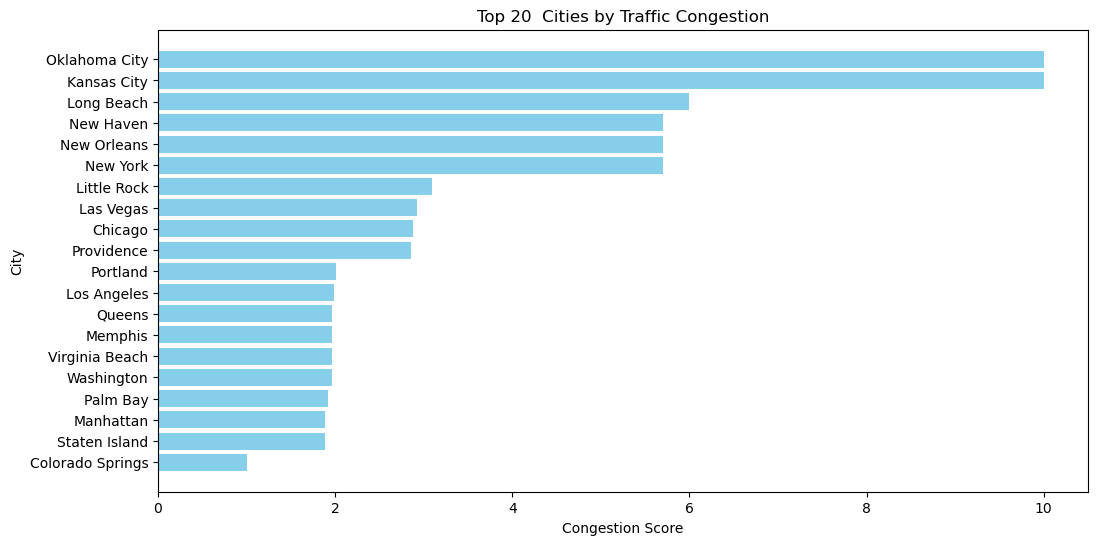

In [84]:
# Ploting the top 20 cities by congestion score
top_cities = scores_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_cities['City'], top_cities['Congestion Score'], color='skyblue')
plt.xlabel('Congestion Score')
plt.ylabel('City')
plt.title('Top 20  Cities by Traffic Congestion')
plt.gca().invert_yaxis()
plt.show()

# Generating the Word Cloud

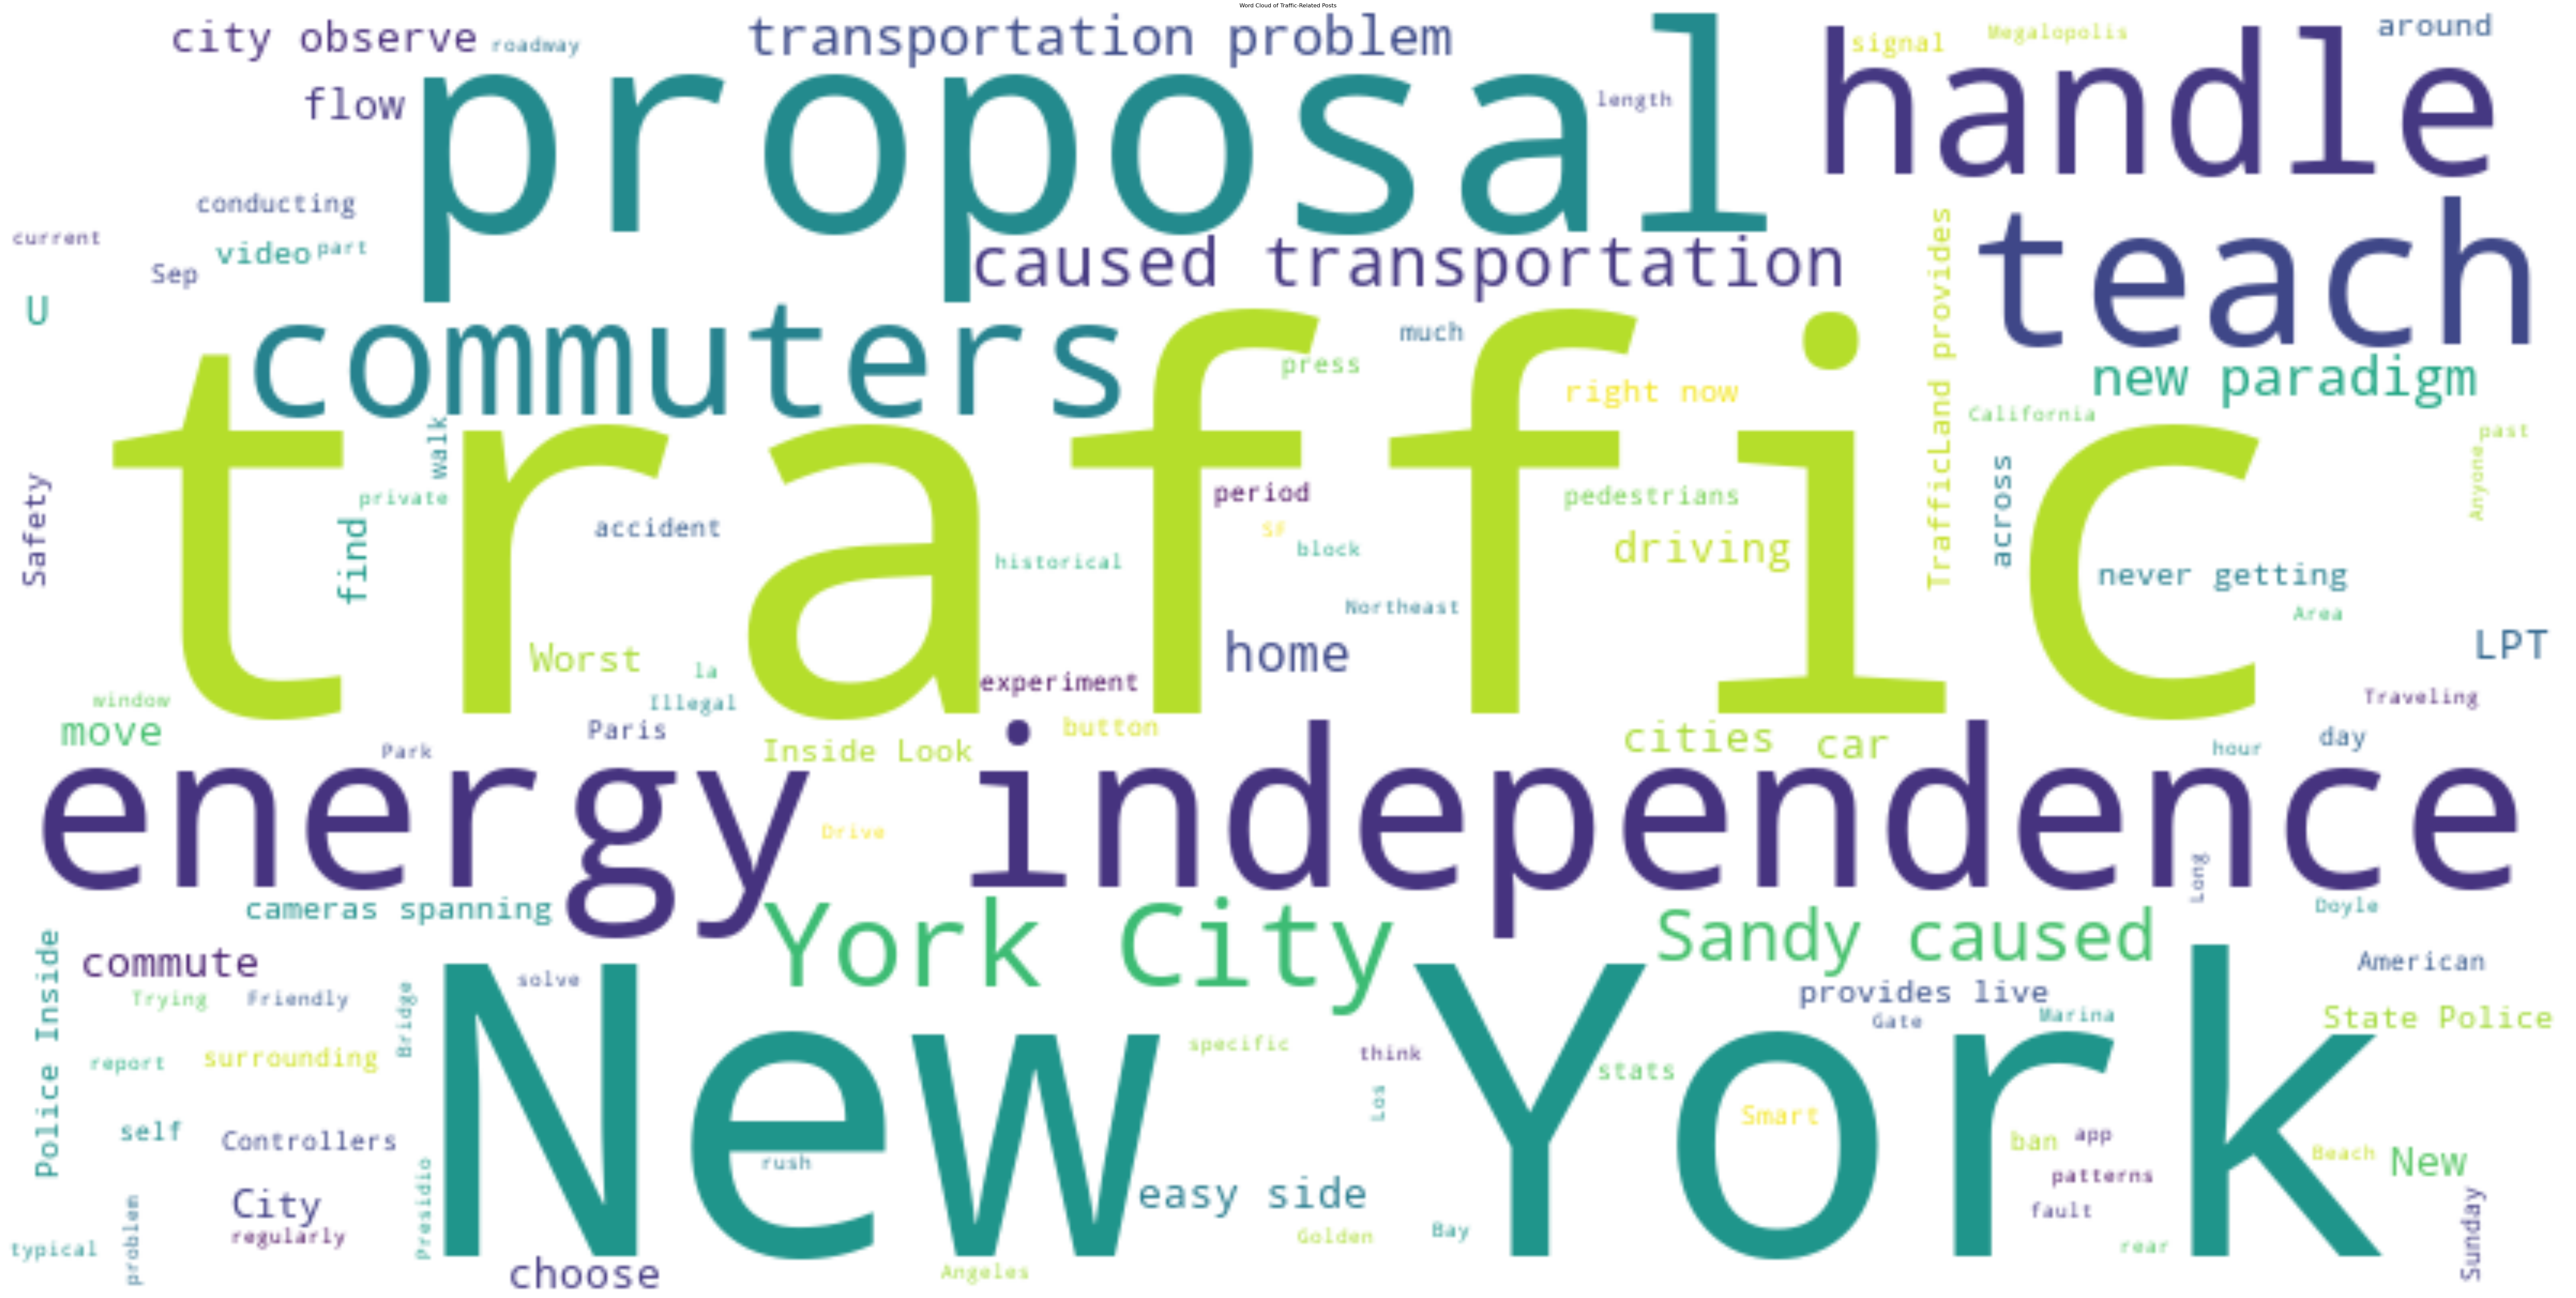

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# Generate and plot the word cloud
text = ' '.join(posts_df['title'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(100, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Traffic-Related Posts')
plt.show()

# Generating a Heat Map

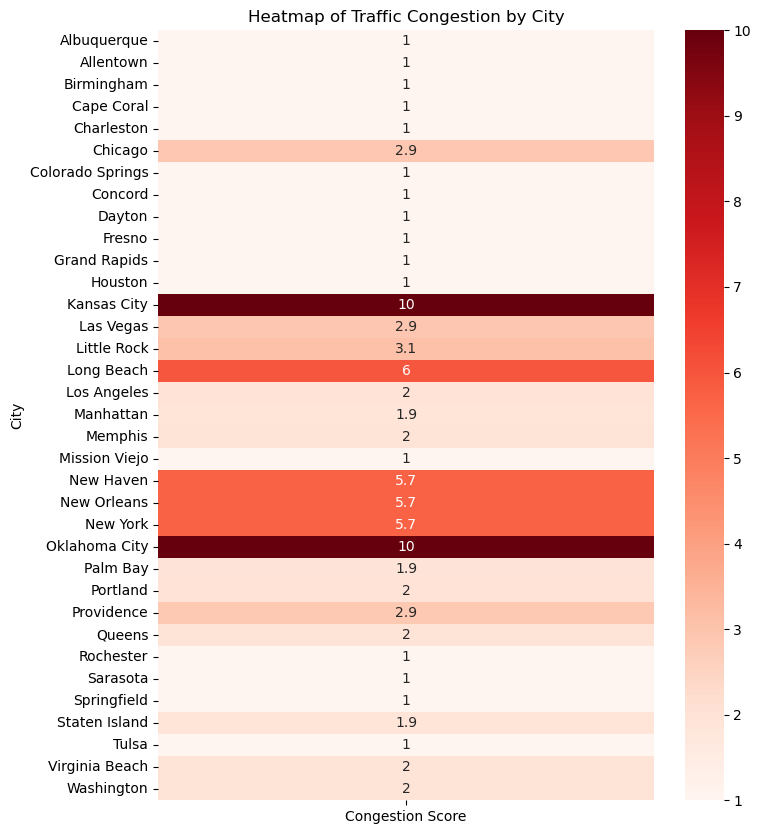

In [86]:
# Creating a heatmap of congestion scores
top_20_cities = scores_df.head(35)
heatmap_data = top_20_cities.pivot_table(index='City', values='Congestion Score', aggfunc='mean')
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', cbar=True)

#sns.heatmap(heatmap_data, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

plt.title('Heatmap of Traffic Congestion by City')
plt.show()